## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc,roc_curve,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

## Import Dataset 

In [2]:
data= pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [4]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
data.replace('?', np.nan, inplace=True)

In [ ]:
data['occupation'].value_counts()[:20].plot(kind='barh')
plt.title('Missing values in occupation')
plt.show();
data['native-country'].value_counts()[:20].plot(kind='barh')
plt.title('Missing values in Native Country')
plt.show();
data['workclass'].value_counts()[:20].plot(kind='barh')
plt.title('Missing values in Work Class')
plt.show();

In [ ]:
data.dtypes

In [12]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Self Employed,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
data['native-country'].replace([' Canada', ' Cuba', ' Dominican-Republic', ' El-Salvador', ' Guatemala',' Haiti', ' Honduras', ' Jamaica',
              ' Mexico', ' Nicaragua',' Outlying-US(Guam-USVI-etc)', ' Puerto-Rico', ' Trinadad&Tobago',' United-States',np.nan]
             ,'North America', inplace = True)

data['native-country'].replace([' Cambodia', ' China', ' Hong', ' India', ' Iran', ' Japan', ' Laos',
          ' Philippines', ' Taiwan', ' Thailand', ' Vietnam'],'Asia', inplace = True)

data['native-country'].replace([' Columbia', ' Ecuador', ' Peru'],'South America', inplace = True)

data['native-country'].replace([' England', ' France', ' Germany', ' Greece', ' Holand-Netherlands',
            ' Hungary', ' Ireland', ' Italy', ' Poland', ' Portugal', ' Scotland',
            ' Yugoslavia'],'Europe', inplace = True)

data['native-country'].replace([' South'],'Other', inplace = True)

data['native-country'].unique()

array(['United-States', 'North America', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [35]:
data2.head()

,age,workclass,education,marital-status,income
0,25,Private,6.7,Never-married,0
1,38,Private,9,Married-civ-spouse,0
2,28,Local-gov,6.7,Married-civ-spouse,1
3,44,Private,6.7,Married-civ-spouse,1
4,18,Self Employed,6.7,Never-married,0


In [38]:
data2['workclass'].replace(['Private','Self-emp-not-inc','Self-emp-inc'], 'Self Employed', inplace = True)
data2['workclass'].replace(['State-gov', 'Local-gov', 'Federal-gov'], 'Govt Employee', inplace = True)
data2['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed', inplace = True)
data2['workclass'].unique()


array(['Self Employed', 'Govt Employee', 'Unemployed'], dtype=object)

In [47]:
data2['marital-status'].replace(['Never-married'], 'Single', inplace = True)
data2['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married', inplace = True)
data2['marital-status'].replace(['Separated','Divorced'], 'Separated', inplace = True)
data2['marital-status'].replace(['Widowed'], 'Widowed', inplace = True)
data2['marital-status'].unique()


array(['Single', 'Married', 'Widowed', 'Separated'], dtype=object)

In [14]:
data['AgeCat']=''
data.loc[data['age']<= 30, 'AgeCat'] = '15-30'
data.loc[(data['age']>30) & (data['age']<=45), 'AgeCat']= '31-45'
data.loc[(data['age']>45) &(data['age']<=60), 'AgeCat']= '46-60'
data.loc[(data['age']>60) & (data['age']<=75), 'AgeCat']= '61-75'
data.loc[data['age']>75, 'AgeCat']= '75+'
data['AgeCat'].unique()

array(['15-30', '31-45', '61-75', '46-60', '75+'], dtype=object)

In [ ]:
data['HoursPerWeekCat']=''
data.loc[data['hours-per-week']<= 20, 'HoursPerWeekCat'] = '1-20'
data.loc[(data['hours-per-week']>20)& (data['hours-per-week']<=40), 'HoursPerWeekCat']='21-40'
data.loc[(data['hours-per-week']>40)&(data['hours-per-week']<=60), 'HoursPerWeekCat']='41-60'
data.loc[(data['hours-per-week']>60)& (data['hours-per-week']<=80), 'HoursPerWeekCat']='61-80'
data.loc[data['hours-per-week']>80,'HoursPerWeekCat']='80+'
data['HoursPerWeekCat'].unique()

In [ ]:
data[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

In [15]:
data['EduNumCat']=''
data.loc[(data['education']== 'School'), 'EduNumCat'] = '6.7'
data.loc[(data['education']== 'High Grade'), 'EduNumCat'] = '9'
data.loc[(data['education']== 'College'), 'EduNumCat'] = '10.4'
data.loc[(data['education']== 'Bachelors'), 'EduNumCat'] = '13'
data.loc[(data['education']== 'Masters'), 'EduNumCat'] = '14'
data.loc[(data['education']== 'Doctorate'), 'EduNumCat'] = '16'
data['EduNumCat'].unique()

array(['', '13', '14', '16'], dtype=object)

In [23]:
data['education'].replace(['5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 
                           'Preschool', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', '11th'], '6.7', inplace = True)

data['education'].replace(['HS-grad'], '9', inplace = True)
data['education'].replace(['Bachelors'], '13', inplace = True)
data['education'].replace(['Masters'], '14', inplace = True)
data['education'].replace(['Doctorate'], '16', inplace = True)

data['education'].unique()

array(['6.7', '9', '13', '14', '16'], dtype=object)

In [27]:
keep_columns = ['age', 'workclass', 'education', 'marital-status', 'income']
data2 = data[keep_columns]

In [62]:
data2.head()

,age,workclass,education,marital-status,income
0,25,Self Employed,Other,Single,0
1,38,Self Employed,High-School,Married,0
2,28,Govt Employee,Other,Married,1
3,44,Self Employed,Other,Married,1
4,18,Self Employed,Other,Single,0


In [59]:
data2['education'].unique()

array(['Other', '9', '13', '14', '16'], dtype=object)

In [61]:
data2['education'].replace(['6.7'], 'Other', inplace = True)
data2['education'].replace(['9'], 'High-School', inplace = True)
data2['education'].replace(['13'], 'Bachelors', inplace = True)
data2['education'].replace(['14'], 'Masters', inplace = True)
data2['education'].replace(['16'], 'Doctorate', inplace = True)
data2['education'].unique()

array(['Other', 'High-School', 'Bachelors', 'Masters', 'Doctorate'],
      dtype=object)

In [30]:
data2['income'].replace(['>50K'],1, inplace=True)
data2['income'].replace(['<=50K'],0, inplace=True)

In [51]:
data2.head()

,age,workclass,education,marital-status,income
0,25,Self Employed,6.7,Single,0
1,38,Self Employed,9,Married,0
2,28,Govt Employee,6.7,Married,1
3,44,Self Employed,6.7,Married,1
4,18,Self Employed,6.7,Single,0


In [48]:
data2['marital-status'].unique()

array(['Single', 'Married', 'Widowed', 'Separated'], dtype=object)

In [63]:
data_OneHot=pd.get_dummies(data2, columns=['workclass','education','marital-status'])
data_OneHot.head()

,age,income,workclass_Govt Employee,workclass_Self Employed,workclass_Unemployed,education_Bachelors,education_Doctorate,education_High-School,education_Masters,education_Other,marital-status_Married,marital-status_Separated,marital-status_Single,marital-status_Widowed
0,25,0,0,1,0,0,0,0,0,1,0,0,1,0
1,38,0,0,1,0,0,0,1,0,0,1,0,0,0
2,28,1,1,0,0,0,0,0,0,1,1,0,0,0
3,44,1,0,1,0,0,0,0,0,1,1,0,0,0
4,18,0,0,1,0,0,0,0,0,1,0,0,1,0


In [64]:
# Write this painful shit to memory so yu never have to do it agian
data_OneHot.to_csv('file_name.csv', index=False)

In [65]:
!ls

adult.csv  file_name.csv  income_predictor.ipynb


## Creating Independent and Dependent Variables

In [67]:
df=data_OneHot.copy()
X= df.drop('income', axis=1)
Y= df['income']
Y.head(1)

0    0
Name: income, dtype: int64

## Normailzation

In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = X.columns)
X.head()

In [ ]:
X.describe(include='all')

In [72]:
xtrain, xtest, ytrain, ytest=train_test_split(X,Y, test_size=0.22, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(38096, 13) (38096,)
(10746, 13) (10746,)


In [73]:
ytest.value_counts()

0    8180
1    2566
Name: income, dtype: int64

## Defining Decision Tree classifier

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=100)

In [ ]:
clf_dt.fit(xtrain, ytrain)

In [ ]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

### Task 5: Find accuracy for Decision Tree

In [ ]:
accuracy_dt = accuracy_score(ytest, dt_pred)
print("Accuracy: {}".format(accuracy_dt))

## Task 9: Print Classification Report for Decision Tree

In [ ]:
print(classification_report(ytest,dt_pred))

In [ ]:
classification_dt=classification_report(ytest,dt_pred, output_dict=True)
print(round(classification_dt['0']['precision'],2))
print(round(classification_dt['1']['precision'],2))
print(round(classification_dt['0']['recall'],2))
print(round(classification_dt['1']['recall'],2))
print(round(classification_dt['0']['f1-score'],2))
print(round(classification_dt['1']['f1-score'],2))
print(round(classification_dt['accuracy'],2))

## Confusion Matrix

In [ ]:
confusion_matrix(ytest, dt_pred)
confusion_matrix(ytest, dt_pred).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, dt_pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot= True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()


## ROC Curve

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [ ]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

## Features Importance

In [ ]:
clf_dt.feature_importances_

In [ ]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [ ]:
features_tuple

In [ ]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [ ]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Datset Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")
plt.show()

## Random Forest

In [75]:
clf_rf = RandomForestClassifier(random_state=100)

In [76]:
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=100)

In [77]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

## Task 14: Print Classification Report for Random Forest

In [78]:
tn, fp, fn, tp = confusion_matrix(ytest, rf_pred).ravel()
rf_specificity= tn/(tn+fp)
rf_specificity

0.9367970660146699

In [79]:
classification_rf=classification_report(ytest,rf_pred, output_dict=True)
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      8180
           1       0.66      0.39      0.49      2566

    accuracy                           0.81     10746
   macro avg       0.75      0.66      0.69     10746
weighted avg       0.79      0.81      0.79     10746



## ROC Curve for Random Forest

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

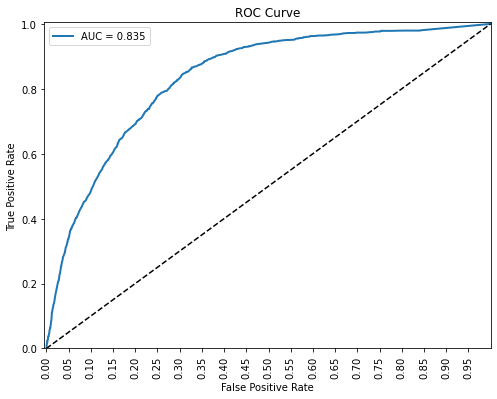

In [81]:
auc_rf=roc_auc_score(ytest,rf_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

## Features Importance

In [ ]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))

In [ ]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [ ]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Dataset Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

In [82]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

#RF_cv1.cv_results_, 
RF_cv1.best_params_, RF_cv1.best_score_

KeyboardInterrupt: 

#### So we found 'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 63 as optimum parameters

In [83]:
param_grid2 = {"n_estimators" : [63,66],
           "max_depth" : [14,15],
           "min_samples_leaf" : [4,5]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

#RF_cv2.grid_scores_, 
RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 14, 'min_samples_leaf': 4, 'n_estimators': 63},
 0.8110036588319229)

## Tuned Random Forest

In [84]:
RF_cv2.best_estimator_

RandomForestClassifier(max_depth=14, min_samples_leaf=4, n_estimators=63,
                       random_state=100)

In [85]:
RF_grid = RF_cv2.best_estimator_

In [86]:
RF_grid.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=14, min_samples_leaf=4, n_estimators=63,
                       random_state=100)

In [87]:
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t=RF_grid.predict_proba(xtest)[:,1]

### Task 19: Print Classification Report for Tuned Random Forest

In [88]:
classification_rf_t=classification_report(ytest,rf_pred_t, output_dict=True)
print(classification_report(ytest, rf_pred_t))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      8180
           1       0.68      0.38      0.49      2566

    accuracy                           0.81     10746
   macro avg       0.76      0.66      0.69     10746
weighted avg       0.80      0.81      0.79     10746



## ROC Curve for Tuned Random Forest

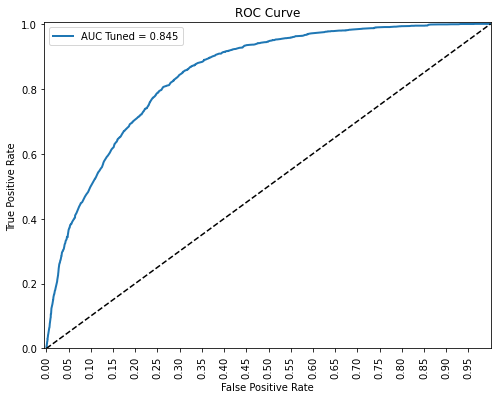

In [89]:
auc_rf_t=roc_auc_score(ytest,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

# Save the Model

|

|

In [92]:
import pickle
with open('income_predictor.pickle', 'wb') as f:
    pickle.dump(clf_rf, f)

In [100]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [101]:
!ls -alh

total 22M
drwxrwxr-x 3 alex alex 4.0K Oct 25 15:52 .
drwxrwxr-x 6 alex alex 4.0K Oct 25 10:25 ..
-rw-rw-r-- 1 alex alex 5.1M Sep 19  2019 adult.csv
-rw-rw-r-- 1 alex alex  319 Oct 25 15:52 columns.json
-rw-rw-r-- 1 alex alex 1.4M Oct 25 13:13 file_name.csv
-rw-rw-r-- 1 alex alex 194K Oct 25 15:50 income_predictor.ipynb
-rw-rw-r-- 1 alex alex  15M Oct 25 15:44 income_predictor.pickle
drwxrwxr-x 2 alex alex 4.0K Oct 25 12:38 .ipynb_checkpoints
-rw-rw-r-- 1 alex alex   21 Oct 25 10:50 .jovianrc


|

|

# Finished Stuff

## Hyperparameters Tuning Using Randomized Search

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc,roc_curve,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
rf_rs = RandomForestClassifier(random_state=100)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [ ]:
random_grid1 = {"n_estimators" : n_estimators,
           "max_depth" : max_depth,
           "min_samples_split" :min_samples_split}

In [ ]:
random_grid1

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_rs, param_distributions = random_grid1, n_iter = 50, cv = 5, verbose=2, random_state=100)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

## Selecting the best classifier

In [ ]:
clf_rf_rand=rf_random.best_estimator_

In [ ]:
clf_rf_rand.fit(xtrain,ytrain)

In [ ]:
pred_rf_rand=clf_rf_rand.predict(xtest)

In [ ]:
prb_rf_rand=clf_rf_rand.predict_proba(xtest)[:,1]

## Confusion Matrix

In [ ]:
confusion_matrix(ytest, pred_rf_rand)
confusion_matrix(ytest, pred_rf_rand).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, pred_rf_rand).ravel()
conf_matrix=pd.DataFrame({"pred 50K+":[tp,fp],"pred upto 50K":[fn,tn]},index=["Actual 50K+","Actual upto 50K"])
conf_matrix

In [ ]:
sns.heatmap(confusion_matrix(ytest, pred_rf_rand), annot= True, fmt='g')
plt.show()

## Print the Classification Report of Tuned Random Forest through Randomized Search

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, pred_rf_rand).ravel()
rf_r_specificity= tn/(tn+fp)
rf_r_specificity

In [ ]:
classification_rf_r=classification_report(ytest,pred_rf_rand, output_dict=True)
print(classification_report(ytest,pred_rf_rand))

## ROC Curve

In [ ]:
auc_rf_r=roc_auc_score(ytest,prb_rf_rand)
fpr,tpr,threshold=roc_curve(ytest,prb_rf_rand)
plot_roc_curve(fpr,tpr,label='AUC Tuned Random = %0.3f'% auc_rf_r)

In [ ]:
plt.figure(0).clf()
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')

fpr, tpr, threshold = metrics.roc_curve(ytest, rf_pred_prb)
auc = metrics.roc_auc_score(ytest, rf_pred_prb)
plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))


fpr, tpr, threshold = metrics.roc_curve(ytest, rf_pred_prb_t)
auc = metrics.roc_auc_score(ytest, rf_pred_prb_t)
plt.plot(fpr,tpr,label="AUC Tuned using GridSearchCV="+str(round(auc,3)))


fpr, tpr, threshold = metrics.roc_curve(ytest, prb_rf_rand)
auc = metrics.roc_auc_score(ytest, prb_rf_rand)
plt.plot(fpr,tpr,label="AUC Tuned using RandomizedSearchCV="+str(round(auc,3)))

plt.legend(loc=0)

## Ada Boost

In [ ]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain) 

In [ ]:
pred_clf_adb=clf_adb.predict(xtest)
adb_pred_prb=clf_adb.predict_proba(xtest)[:,1]

## Confusion Matrix

In [ ]:
confusion_matrix(ytest, pred_clf_adb)
confusion_matrix(ytest, pred_clf_adb).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, pred_clf_adb).ravel()
conf_matrix=pd.DataFrame({"pred 50K+":[tp,fp],"pred upto 50K":[fn,tn]},index=["Actual 50K+","Actual upto 50K"])
conf_matrix

In [ ]:
sns.heatmap(confusion_matrix(ytest, pred_clf_adb), annot= True, fmt='g')
plt.show()

## Print Classification Report for Ada Boost

In [ ]:
classification_adb=classification_report(ytest,pred_clf_adb, output_dict=True)
print(classification_report(ytest,pred_clf_adb))

## ROC Curve

In [ ]:
auc_adb=roc_auc_score(ytest,adb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,adb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_adb)

## XGBoost
### Extreme Gradient Boosting Algorithm

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)
clf_xgb.fit(xtrain, ytrain)

In [ ]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

## Print Classification Report of XGBoost

## Confusion Matrix

In [ ]:
confusion_matrix(ytest, xgb_pred)
confusion_matrix(ytest, xgb_pred).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, xgb_pred).ravel()
conf_matrix=pd.DataFrame({"pred 50K+":[tp,fp],"pred upto 50K":[fn,tn]},index=["Actual 50K+","Actual upto 50K"])
conf_matrix

In [ ]:
sns.heatmap(confusion_matrix(ytest, xgb_pred), annot= True, fmt='g')
plt.show()

In [ ]:
classification_xgb=classification_report(ytest,xgb_pred, output_dict=True)
print(classification_report(ytest,xgb_pred))

## ROC Curve

In [ ]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

## Comparison

In [ ]:
print(round(classification_adb['0']['precision'],2))
print(round(classification_adb['1']['precision'],2))
print(round(classification_adb['0']['recall'],2))
print(round(classification_adb['1']['recall'],2))
print(round(classification_adb['0']['f1-score'],2))
print(round(classification_adb['1']['f1-score'],2))
print(round(classification_adb['accuracy'],2))


In [ ]:
comparison_dict={"Algorithm":["Decision Tree","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
                 "Precision[0]":[round(classification_dt['0']['precision'],2),round(classification_rf['0']['precision'],2),round(classification_rf_t['0']['precision'],2),round(classification_rf_r['0']['precision'],2),round(classification_xgb['0']['precision'],2),round(classification_adb['0']['precision'],2)],
                 "Precision[1]":[round(classification_dt['1']['precision'],2),round(classification_rf['1']['precision'],2),round(classification_rf_t['1']['precision'],2),round(classification_rf_r['1']['precision'],2),round(classification_xgb['1']['precision'],2),round(classification_adb['1']['precision'],2)],
                 "recall[0]":[round(classification_dt['0']['recall'],2),round(classification_rf['0']['recall'],2),round(classification_rf_t['0']['recall'],2),round(classification_rf_r['0']['recall'],2),round(classification_xgb['0']['recall'],2),round(classification_adb['0']['recall'],2)],
                 "recall[1]":[round(classification_dt['1']['recall'],2),round(classification_rf['1']['recall'],2),round(classification_rf_t['1']['recall'],2),round(classification_rf_r['1']['recall'],2),round(classification_xgb['1']['recall'],2),round(classification_adb['1']['recall'],2)],
                 "F1 Score[0]":[round(classification_dt['0']['f1-score'],2),round(classification_rf['0']['f1-score'],2),round(classification_rf_t['0']['f1-score'],2),round(classification_rf_r['0']['f1-score'],2),round(classification_xgb['0']['f1-score'],2),round(classification_adb['0']['f1-score'],2)],
                 "F1 Score[1]":[round(classification_dt['1']['f1-score'],2),round(classification_rf['1']['f1-score'],2),round(classification_rf_t['1']['f1-score'],2),round(classification_rf_r['1']['f1-score'],2),round(classification_xgb['1']['f1-score'],2),round(classification_adb['1']['f1-score'],2)],
                 "Accuracy":[round(classification_dt['accuracy'],2),round(classification_rf['accuracy'],2),round(classification_rf_t['accuracy'],2),round(classification_rf_r['accuracy'],2),round(classification_xgb['accuracy'],2),round(classification_adb['accuracy'],2)],
                 "AUC":[round(auc_dt,2),round(auc_rf,2),round(auc_rf_t,2),round(auc_rf_r,2),round(auc_xgb,2),round(auc_adb,2)],
                }
comparison=pd.DataFrame(comparison_dict)
comparison.sort_values(['AUC', 'F1 Score[1]', 'Accuracy'], ascending=False)